In [108]:
# !git clone https://github.com/htsull/Algo_Python_Class_Project.git

fatal: destination path 'Algo_Python_Class_Project' already exists and is not an empty directory.


In [109]:
# ls

Algo_Python_Class_Project/  sample_data/


* ## **Import tools and primary data**

In [110]:
# import pandas as pd
# from pprint import pprint
# df1 = pd.read_csv("Algo_Python_Class_Project/usagers.csv")
# df2 = pd.read_csv("Algo_Python_Class_Project/vehicules.csv")
# df3 = pd.read_csv("Algo_Python_Class_Project/caract.csv")
# df4 = pd.read_csv("Algo_Python_Class_Project/lieux.csv")
# print('Done')

Done


In [1]:
import pandas as pd
from pprint import pprint
df1 = pd.read_csv("usagers.csv")
df2 = pd.read_csv("vehicules.csv")
df3 = pd.read_csv("caract.csv")
df4 = pd.read_csv("lieux.csv")
print('Done')

Done


* ## **Merge original data**

In [2]:
data1 = df1.merge(df2,on=['Num_Acc','num_veh'])
data2 = df3.merge(df4,on = 'Num_Acc')
data = data1.merge(data2,on='Num_Acc')

* ## **Missing values handling**

+ ### Dropping variables

In [3]:
# count nan values
nan_values = data.isna().sum()
# percentage of nan values ay column
nan_values = nan_values.sort_values(ascending=False) *100 / data.shape[0]
# columns with nan values greater than 20%
nan_values = nan_values.loc[nan_values > 10]
nan_values

long       100.000000
lartpc      99.649149
larrout     99.374178
occutc      98.589084
v2          92.672702
v1          18.566545
dtype: float64

In [4]:
# Copy of original data
df = data.copy()
# Drop nan_values criteria columns
df = df.drop(nan_values.to_dict().keys(), axis=1)
# Drop other column not concerned or not making sens in the process
# df = df.drop(['lat','secu1', 'secu2', 'secu3'], axis=1)

print('Dimension : {}'.format(df.shape))

Dimension : (133105, 49)


In [114]:
#  df.rename(columns={'catu': 'cat_usagers', 
#                     'grav': 'gravite',
#                     'obs' : 'obs_fixe',
#                     'obsm' : 'obs_mobile'
                    
#                     }, 
#            inplace=True)

* ### Dropping rows

In [5]:
# Drop rows with any cells with nan values
df = df.dropna(axis=0, how='any')
print('Dimension : {}'.format(df.shape))

Dimension : (124678, 49)


===============================================================================

In [116]:
# convert sexe as categorical
# df.sexe = df.sexe.astype('category')
# df.sexe.dtypes

In [6]:
# variance 
df.var().sort_values().head()

an      5.169920e-26
sexe    2.175643e-01
agg     2.352248e-01
prof    3.100695e-01
vosp    3.490951e-01
dtype: float64

In [7]:
# dropping `an` variable
df = df.drop('an', axis=1)

In [119]:
# # Find the high correlated variables (> 60% in our case)
# c = df.corr().abs()
# s = c.unstack()
# so = s.sort_values(ascending=True)
# so = so[so > .6]
# print(so[so != 1])

In [120]:
# # Dropping the high correlated varialbles, priority to these with less categories
# df = df.drop(['locp', 'vma', 'etatp', 'place'], axis=1)
# print('Done')

In [121]:
# c = df.corr().abs()
# s = c.unstack()
# so = s.sort_values(ascending=False)
# so[so !=1]

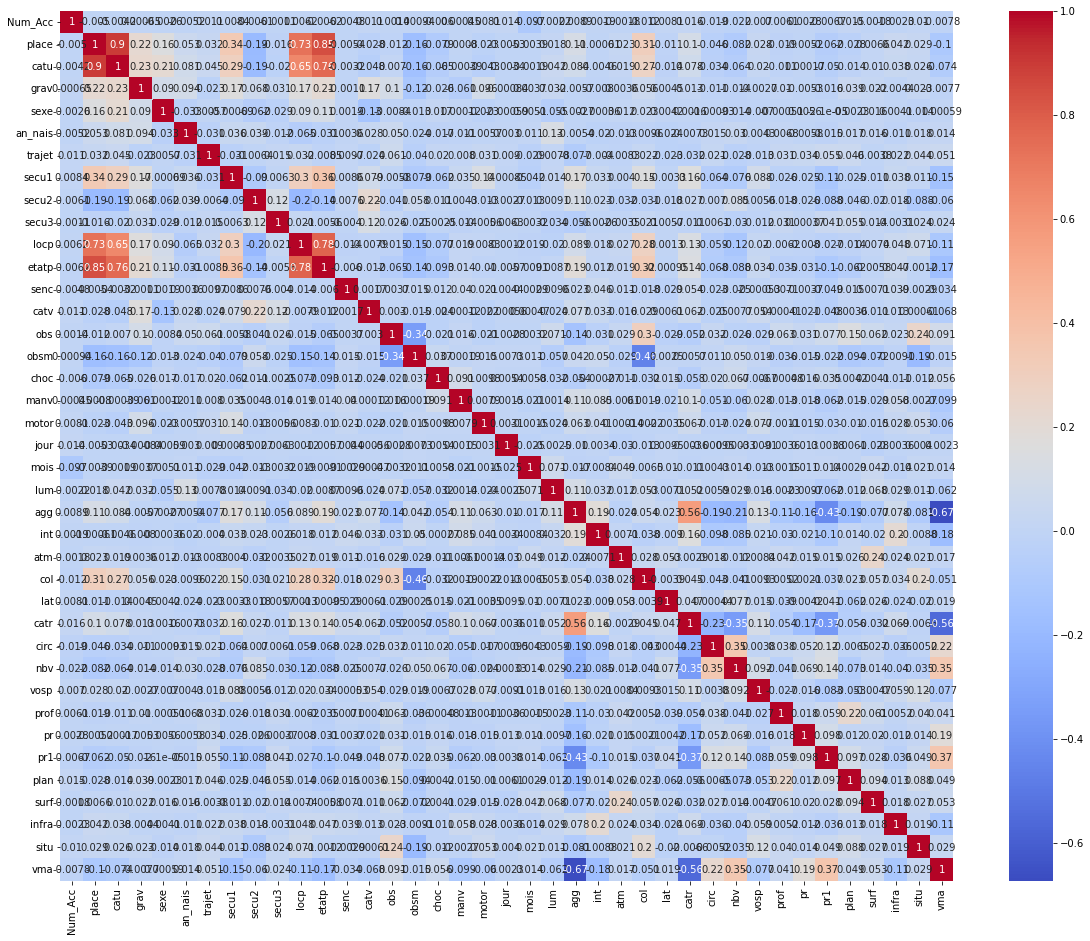

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

In [8]:
df.hrmn.head()

0     1:30
1     1:30
2     1:30
3     2:50
4    15:15
Name: hrmn, dtype: object

In [9]:
df.hrmn.dtypes

dtype('O')

In [10]:
df.hrmn = df.hrmn.str.split(':').str[0]

# gestion des modalites 

### - variables conversion in cat type

In [11]:
len(df.voie.unique())

14260

In [12]:
cat = ['lum', 'agg', 'int', 'atm', 'col',
        'catr', 'circ', 'vosp', 'prof', 
       'plan', 'surf', 'infra', 'situ', 'senc',
       'catv', 'obs', 'obsm', 'choc', 'manv', 
       'catu', 'sexe', 'trajet', 'actp',
       'locp', 'vma', 'etatp', 'place', 'hrmn']

df1 = df.copy()

df1[cat] = df1[cat].astype('category')

# df1.select_dtypes(exclude=['category']).columns

drop = ['an_nais', 'motor', 
      'jour', 'mois', 'dep', 
      'com', 'adr', 'voie',
      'nbv', 'pr', 'pr1', 'id_vehicule_x',
      'Num_Acc',  'num_veh', 'id_vehicule_y', 'lat' ]

df1 = df1.drop(drop, axis=1)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124678 entries, 0 to 133104
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   place   124678 non-null  category
 1   catu    124678 non-null  category
 2   grav    124678 non-null  int64   
 3   sexe    124678 non-null  category
 4   trajet  124678 non-null  category
 5   secu1   124678 non-null  int64   
 6   secu2   124678 non-null  int64   
 7   secu3   124678 non-null  int64   
 8   locp    124678 non-null  category
 9   actp    124678 non-null  category
 10  etatp   124678 non-null  category
 11  senc    124678 non-null  category
 12  catv    124678 non-null  category
 13  obs     124678 non-null  category
 14  obsm    124678 non-null  category
 15  choc    124678 non-null  category
 16  manv    124678 non-null  category
 17  hrmn    124678 non-null  category
 18  lum     124678 non-null  category
 19  agg     124678 non-null  category
 20  int     124678 non-null  c

### - Reduction of categories in some variables

In [13]:
# on remplace ces observations par la modalite 9 = AUTRE
df1.trajet.loc[(df1.trajet == -1) | (df1.trajet == 0)] = 9

# action du pieton
df1.actp.loc[(df1.actp == '-1') | (df1.actp == '0') | (df1.actp == 'A') | (df1.actp == 'B')] = '9'

# obstacle de mobilite
df1.obsm.loc[(df1.obsm == -1) | (df1.obsm == 0)] = 9

# sens de la circulation
df1.circ.loc[df1.circ == -1] = 1

print("Done")

Done


### - Sampling problem handling (Improper balance of the data)

In [14]:
df1.grav.value_counts()

1    51992
4    50842
3    18723
2     3121
Name: grav, dtype: int64

Labels : 
    <li>1 - Indemne </li>
    <li>2 - Tué</li>
    <li>3 - Blessé hospitalisé</li>
    <li>4 - Blessé léger</li>

<!-- We are going to merge the categories `2` and `3` and  considered these observations as people who need `serious and urgent medical attention` or `dead`. -->

In [130]:
# df1.grav.replace(2, 3, inplace=True)
# df1.grav.replace(1, 4, inplace=True)
# df1.grav.value_counts(normalize = True)

In [15]:
# df1 = df1.sample(frac = .5)
# print(df1.shape)
y = df1.grav
X = df1.drop(columns='grav')


In [16]:
df1.grav.unique()

array([4, 1, 3, 2], dtype=int64)

In [17]:
df1.grav.value_counts()

1    51992
4    50842
3    18723
2     3121
Name: grav, dtype: int64

<span style = 'color : red'>===================================================================</span>

### Using undersampling methods (imblearn)

In [134]:
# Install imblear
# !pip install imblearn

In [18]:
# import library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({1: 51992, 4: 50842, 3: 18723, 2: 3121})
Resample dataset shape Counter({1: 3121, 2: 3121, 3: 3121, 4: 3121})


In [ ]:
# from collections import Counter
# from imblearn.combine import SMOTEENN
# smote_enn = SMOTEENN(random_state=0)
# X_res, y_res = smote_enn.fit_resample(X, y)
# print(sorted(Counter(y_res).items()))

In [19]:
import numpy as np
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score

In [20]:
# hot encoding of the features
X_data = pd.get_dummies(X_rus.astype(str))

# Normalizing the data
X_N_data = normalize(X_data.values)

y = y_rus
# Splitting the data for training and test purpose
X_train, X_test, y_train, y_test = train_test_split(X_N_data, y, random_state=42, test_size= .3)


In [ ]:
# # hot encoding of the features
# X_data = pd.get_dummies(X.astype(str))

# # Normalizing the data
# X_N_data = normalize(X_data.values)

# # Splitting the data for training and test purpose
# X_train, X_test, y_train, y_test = train_test_split(X_N_data, y, random_state=42, test_size= .3)

<span style = 'color : red'>===================================================================<span>

# Logistic regression

In [21]:
# Importation du module
from sklearn.linear_model import LogisticRegression
# Entrainnement du modèle
logreg = LogisticRegression()


In [22]:
model_reg = logreg.fit(X_train, y_train)

C:\Users\bsully\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
model_reg_score = model_reg.score(X_test, y_test)
print('Base Regression Model Score : {:04.3f}'.format(model_reg_score))

Base Regression Model Score : 0.545


<span style = 'color : yellow'>===================================================================<span>

In [24]:
# Predictions (test set)
predictions_test_reg = model_reg.predict(X_test)



              precision    recall  f1-score   support

           1      0.632     0.734     0.679       943
           2      0.582     0.565     0.574       966
           3      0.422     0.379     0.399       900
           4      0.509     0.492     0.501       937

    accuracy                          0.545      3746
   macro avg      0.536     0.542     0.538      3746
weighted avg      0.538     0.545     0.540      3746



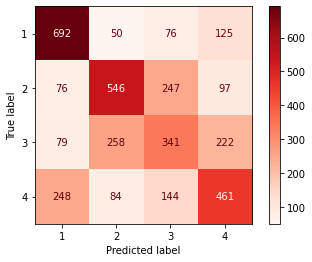

In [25]:
from sklearn.metrics import classification_report, plot_confusion_matrix
disp = plot_confusion_matrix(model_reg,
                             X_test,
                             y_test,
                             cmap='Reds',
                             values_format='d'
                             )
print("")
print(classification_report(y_test, 
                            predictions_test_reg, 
                            digits=3, 
                            zero_division = 1
                            )
      )

# Hyperparameters tuning

In [143]:
# Look at parameters used by our current base forest
print('Parameters currently in use :')
pprint(model_reg.get_params())

Parameters currently in use :
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [144]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'penalty' : ["l2", 'elasticnet', 'l1'],
        'C' : np.logspace(-4, 5, 5),
        'solver': ['saga']
    }
]


In [145]:
grid_reg = GridSearchCV(model_reg, 
                       param_grid, 
                       cv = 2
                       )

In [146]:
# Entrainnement du modèle optimisé
best_grid_reg = grid_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

In [ ]:
# Présentation des paramètres du modèle optimal
print("Parmètres optimisés : ",best_grid_reg.best_params_)

Parmètres optimisés :  {'C': 3.1622776601683795, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
best_reg_model = best_grid_reg.best_estimator_
best_reg_pred = best_reg_model.predict(X_test)

              precision    recall  f1-score   support

           1      0.639     0.741     0.686       943
           2      0.587     0.565     0.576       966
           3      0.416     0.388     0.402       900
           4      0.515     0.486     0.500       937

    accuracy                          0.547      3746
   macro avg      0.539     0.545     0.541      3746
weighted avg      0.541     0.547     0.543      3746



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


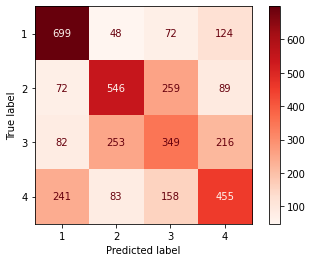

In [ ]:
print(classification_report(y_test, 
                            best_reg_pred, 
                            digits = 3, 
                            zero_division = 1
                            )
      )
disp = plot_confusion_matrix(best_reg_model, 
                             X_test, 
                             y_test, 
                             cmap='Reds', 
                             values_format='d'
                             )

<span style = 'color : red'>===================================================================<span>

# Random forest

In [ ]:
# Default Random forest
rf = RandomForestClassifier(random_state=42)

# fitting 
model_rf = rf.fit(X_train, y_train)

# Predictions (test)
predictions_test = model_rf.predict(X_test)


In [ ]:

print('Trainning accuracy : {:04.3f}'.format(model_rf.score(X_train, y_train)))
print('Test accuracy  : {:04.3f}'.format(model_rf.score(X_test, y_test)))

Trainning accuracy : 0.999
Test accuracy  : 0.565


              precision    recall  f1-score   support

     Indemne      0.647     0.743     0.692       943
         Tué      0.601     0.586     0.594       966
 Hospitalisé      0.470     0.437     0.453       900
Blessé léger      0.518     0.489     0.503       937

    accuracy                          0.565      3746
   macro avg      0.559     0.564     0.560      3746
weighted avg      0.560     0.565     0.562      3746



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


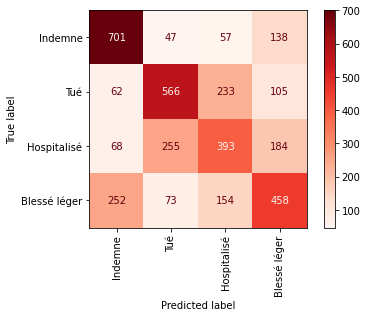

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report
labels_disp = ["Indemne", "Tué", "Hospitalisé", "Blessé léger"]
print(classification_report(y_test, predictions_test, digits=3, zero_division = 1, target_names = labels_disp)),
disp = plot_confusion_matrix(model_rf, 
                             X_test, 
                             y_test, 
                             cmap='Reds', 
                             values_format='d',
                             display_labels=labels_disp,
                             xticks_rotation= 'vertical'
                             )

# Hyperarameters tuning for Random Forest

In [ ]:
# Look at parameters used by our current base forest
print('Parameters currently in use :')
pprint(model_rf.get_params())

Parameters currently in use :
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200,400, 500]
}

# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = model_rf, 
                           param_grid = param_grid,
                           cv = 5, n_jobs=-1)

In [ ]:
# Fit the grid search to the data
best_rf_grid = rf_grid.fit(X_train, y_train)

In [ ]:
print('Ramdom Forest model best parameters :')
pprint(best_rf_grid.best_params_)

Ramdom Forest model best parameters :
{'n_estimators': 400}


In [ ]:
best_rf_model = best_rf_grid.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)

In [ ]:

print('Accuracy on test set (model_rf) : {:04.3f}'.format(best_rf_model.score(X_test, y_test)))

Accuracy on test set (model_rf) : 0.571


              precision    recall  f1-score   support

     Indemne      0.655     0.748     0.698       943
         Tué      0.609     0.592     0.600       966
 Hospitalisé      0.475     0.434     0.454       900
Blessé léger      0.521     0.504     0.512       937

    accuracy                          0.571      3746
   macro avg      0.565     0.569     0.566      3746
weighted avg      0.566     0.571     0.568      3746



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


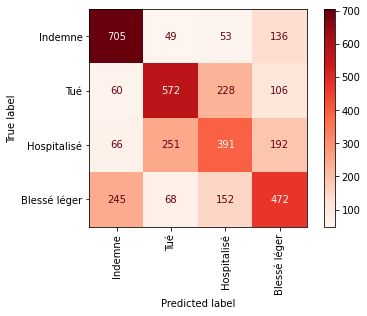

In [ ]:
print(classification_report(y_test, best_rf_pred, 
                            digits=3, zero_division = 1, 
                            target_names = labels_disp))

disp = plot_confusion_matrix(best_rf_model, 
                             X_test, 
                             y_test, 
                             cmap='Reds', 
                             values_format='d',
                             display_labels=labels_disp,
                             xticks_rotation='vertical')

# Extreme Gradient Boosting

In [ ]:
# On redécoupe la base en train/test

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_N_data, y, random_state=42, test_size=.3)


# On crée le modèle :

xgb = GradientBoostingClassifier()

model_xgb = xgb.fit(X_train_xgb, y_train_xgb)
print("Done")

Done


In [ ]:

# On calcul les prédictions
predictions_test_xgb = model_xgb.predict(X_test_xgb)
predictions_train_xgb = model_xgb.predict(X_train_xgb)


In [ ]:
print('Accuracy on test set : {:04.3f}'.format(model_xgb.score(X_test_xgb, y_test_xgb)))

train_acc = accuracy_score(y_train_xgb, predictions_train_xgb)
print('Accuracy on train set : {:04.3f}'.format(train_acc))

Accuracy on test set : 0.538
Accuracy on train set : 0.624


              precision    recall  f1-score   support

     Indemne      0.641     0.730     0.682       943
         Tué      0.583     0.545     0.563       966
 Hospitalisé      0.402     0.387     0.394       900
Blessé léger      0.503     0.486     0.494       937

    accuracy                          0.538      3746
   macro avg      0.532     0.537     0.533      3746
weighted avg      0.534     0.538     0.535      3746



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


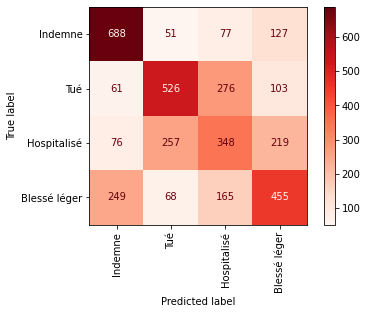

In [ ]:
print(classification_report(y_test_xgb, predictions_test_xgb, digits=3, target_names=labels_disp))
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model_xgb, X_test_xgb, y_test_xgb, 
                             cmap='Reds', values_format='d', 
                             display_labels=labels_disp,
                             xticks_rotation= 'vertical')

# Hyperparameter tuning

In [ ]:
model_xgb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:

param_grid = {
    'n_estimators' : [100, 200, 300]
}

# Instantiate the grid search model

xgb_grid = GridSearchCV(estimator = model_xgb, 
                           param_grid = param_grid,
                           cv = 2, n_jobs=-1)

In [ ]:
best_xgb_model = xgb_grid.fit(X_train_xgb, y_train_xgb)

In [ ]:

best_xgb_model.best_estimator_

GradientBoostingClassifier(n_estimators=300)

In [ ]:

print('Accuracy on test set : {:04.3f}'.format(best_xgb_model.score(X_test_xgb, y_test_xgb)))

Accuracy on test set : 0.550


# Questions
## 1. Comment les modalites avec les petites representations vont affecter le modele?
## 2. Quels sont les algos de classifications qu'on peut encore essayer pour ameliorer?
## 3. Prisen en comptes des suggestions se l'article, comment s'y prendre? (https://larevueia.fr/xgboost-vs-random-forest-predire-la-gravite-dun-accident-de-la-route/)
## 4. Suggestions?

#svm

In [ ]:
##### Création de notre modèle SVM

In [ ]:
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_N_data, y, test_size=0.3)

In [ ]:
print(len(X_train_SVM),' samples in training data\n',
      len(X_test_SVM),' samples in test data\n', )

8738  samples in training data
 3746  samples in test data



In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42) # kernel linéaire
classifier.fit(X_train_SVM, y_train_SVM)

SVC(kernel='linear', random_state=42)

# Faire la prédiction

In [ ]:
y_pred1 = classifier.predict(X_test_SVM)

In [ ]:
# Evaluer le modèle

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_SVM, y_pred1))
print(classification_report(y_test_SVM, y_pred1, digits=3))

[[716  48  67  97]
 [ 73 537 214 109]
 [ 93 285 310 242]
 [277  97 107 474]]
              precision    recall  f1-score   support

           1      0.618     0.772     0.686       928
           2      0.555     0.576     0.565       933
           3      0.444     0.333     0.381       930
           4      0.514     0.496     0.505       955

    accuracy                          0.544      3746
   macro avg      0.533     0.544     0.534      3746
weighted avg      0.533     0.544     0.534      3746



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


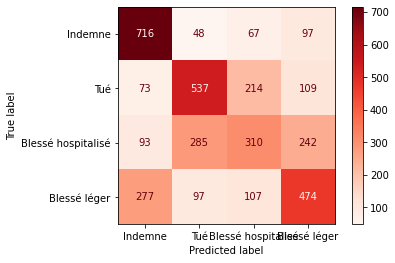

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, 
                             X_test_SVM, 
                             y_test_SVM, 
                             cmap='Reds', 
                             values_format='d',
                             display_labels = ["Indemne", "Tué", "Blessé hospitalisé", "Blessé léger"])

# KNN

In [ ]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn= train_test_split(X_N_data, y, random_state=42, test_size=.3)

In [ ]:
print(len(X_train_knn),' samples in training data\n',
      len(X_test_knn),' samples in test data\n', )

8738  samples in training data
 3746  samples in test data



In [ ]:
# Learning
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # définition de l'estimateur
model_knn = knn.fit(X_train_knn, y_train_knn) # apprentissage (estimation du modèle)

In [ ]:
model_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
print('Base KNN accuracy :{:04.3f}'.format(model_knn.score(X_test_knn, y_test_knn)))


Base KNN accuracy :0.503


In [ ]:
knn_pred = model_knn.predict(X_test_knn)
print(classification_report(y_test_knn, 
                            knn_pred, 
                            digits=3, 
                            target_names=labels_disp))

              precision    recall  f1-score   support

     Indemne      0.572     0.703     0.631       943
         Tué      0.530     0.554     0.541       966
 Hospitalisé      0.401     0.403     0.402       900
Blessé léger      0.480     0.344     0.400       937

    accuracy                          0.503      3746
   macro avg      0.496     0.501     0.494      3746
weighted avg      0.497     0.503     0.495      3746



# tuning

In [ ]:
param_grid = {
    'n_neighbors': [5, 7, 10]
}

# Instantiate the grid search model

knn_grid = GridSearchCV(estimator = model_knn, 
                           param_grid = param_grid,
                           cv = 2, n_jobs=-1)

In [ ]:
best_grid_knn = knn_grid.fit(X_train_knn, y_train_knn)

In [ ]:
best_grid_knn.get_params()

{'cv': 2,
 'error_score': nan,
 'estimator': KNeighborsClassifier(),
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'n_jobs': -1,
 'param_grid': {'n_neighbors': [5, 7, 10]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [ ]:
print('Accuracy on test set : {:04.3f}'.format(best_grid_knn.score(X_test_knn, y_test_knn)))


Accuracy on test set : 0.512


# Imporper balanced data
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/